In [1]:
import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# 更新 Gaussian_graphs.pkl 文件的正确路径
dtw_graphs_path = r"E:\Techniche University of Munich\master thesis\ANTWERP\preprocessed_data\sliding_window\15days\30min\Gaussian_graphs.pkl"

# 读取 pkl 文件
with open(dtw_graphs_path, 'rb') as f:
    merged_graphs = pickle.load(f)

# 获取原始的节点索引
original_node_indices = list(merged_graphs.nodes())

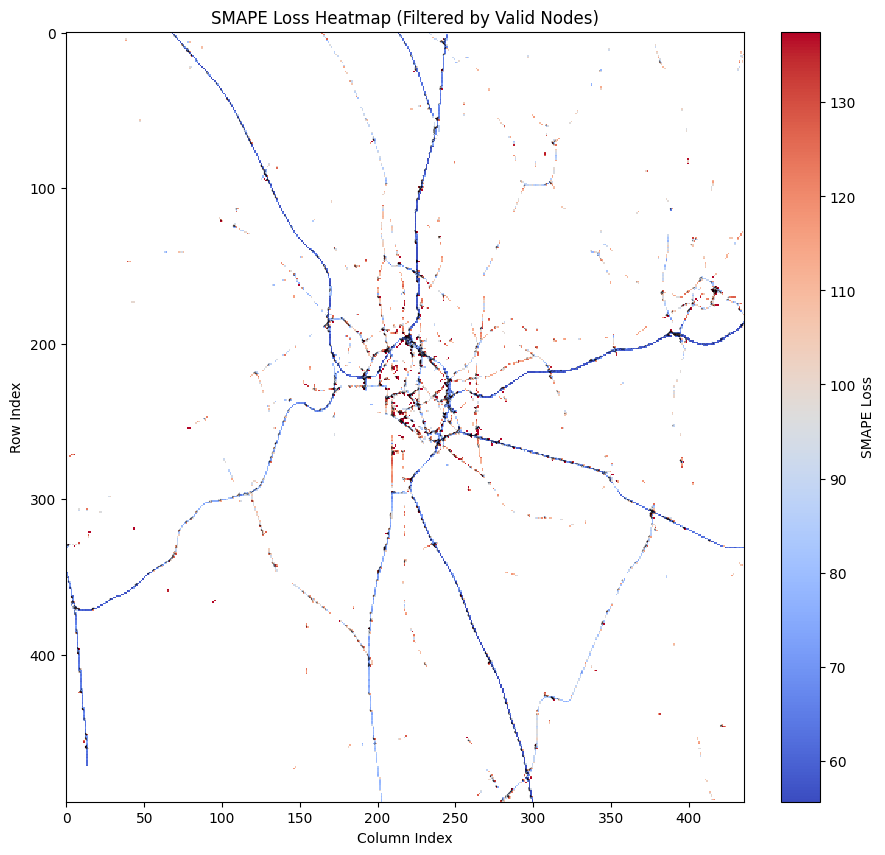

In [3]:
# 读取 CSV 文件node_losses_Dynamic_model_RNN_Encoder-Decoder
node_loss_csv_path = r"E:\Techniche University of Munich\master thesis\ANTWERP\preprocessed_data\sliding_window\15days\30min\node_losses_Static_Model_RNN.csv"
df_loss = pd.read_csv(node_loss_csv_path)

# 提取第一列（扁平化索引）和第六列（SMAPE）
flat_indices = df_loss.iloc[:, 0].values  # 0-5511 的索引
smape_values = df_loss.iloc[:, 5].values  # SMAPE

# 创建索引映射（扁平索引 -> 原始索引）
index_mapping = {i: original_node_indices[i] for i in range(len(original_node_indices))}
original_indices_mapped = [index_mapping[i] for i in flat_indices]

# 逆扁平化回 (row, column) 形式
rows, cols = 495, 436
original_coords = [(idx // cols, idx % cols) for idx in original_indices_mapped]

# 创建空的 495x436 图，用 NaN 作为默认值
heatmap = np.full((rows, cols), np.nan)

# 填充 SMAPE 值
for (r, c), smape in zip(original_coords, smape_values):
    heatmap[r, c] = smape

# 归一化颜色范围
vmin = np.nanpercentile(heatmap, 5)
vmax = np.nanpercentile(heatmap, 95)
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# 绘制 SMAPE 误差热力图（带归一化）
plt.figure(figsize=(12, 10))
im = plt.imshow(heatmap, cmap='coolwarm', norm=norm, interpolation='nearest')

# 添加颜色条
cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label("SMAPE Loss")

# 添加等高线，提高可视化对比度
contour = plt.contour(heatmap, levels=10, colors='black', linewidths=0.5, alpha=0.7)
plt.clabel(contour, inline=True, fontsize=8)

# 图像标签
plt.title("SMAPE Loss Heatmap (Filtered by Valid Nodes)")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

plt.show()


In [4]:
def load_variable(filepath):
    """
    从文件中加载变量。

    参数:
        filepath (str): 文件的完整路径。
    
    返回:
        从文件中加载的变量。
    """
    with open(filepath, 'rb') as f:
        data = pickle.load(f)
    return data

def readdata(filepath):
    """
    读取数据文件并转换为 NumPy 数组。

    参数:
        filepath (str): 文件的完整路径（包括文件名和扩展名）。
    
    返回:
        NumPy 数组表示的数据。
    """
    # 从文件中加载数据
    data = load_variable(filepath)
    
    # 转换为 NumPy 数组
    data = np.array(data)
    
    # 输出数据形状
    print(f"Loaded data shape: {data.shape}")
    return data

Loaded data shape: (720, 495, 436)


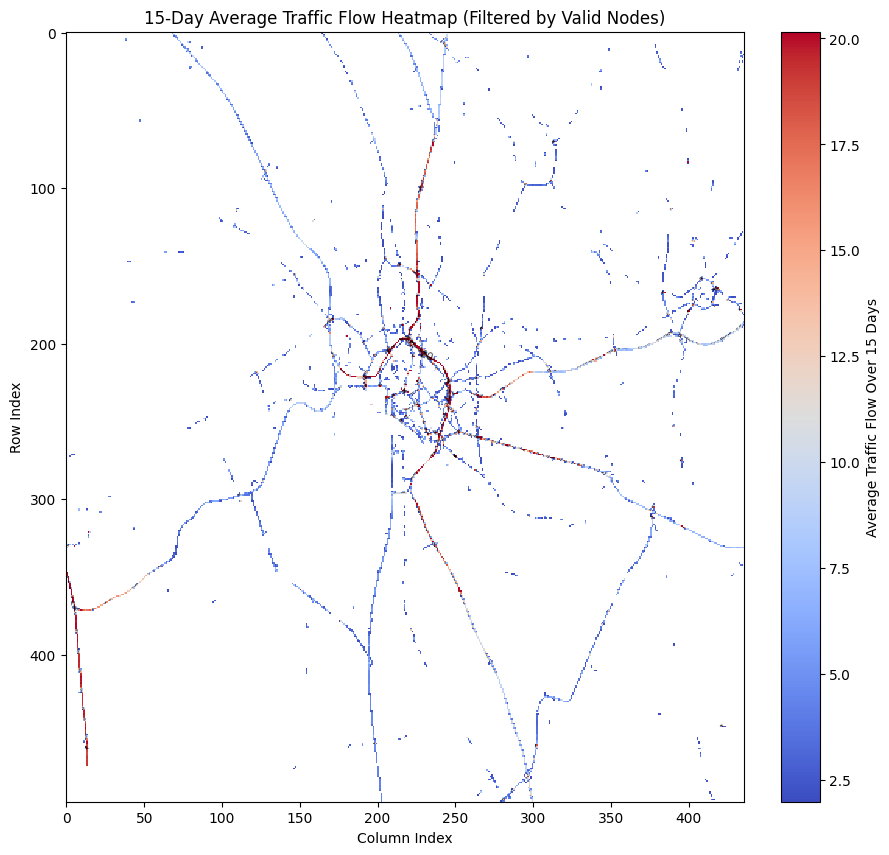

In [5]:
# 读取数据
march_filepath = r"E:\Techniche University of Munich\master thesis\ANTWERP\preprocessed_data\sliding_window\15days\30min\Antwerp_march_last_half_month_samples_30min_timesteps.txt"
traffic_data = readdata(march_filepath)  # 读取数据

# 重新调整数据形状为 (15, 48, 495, 436)
traffic_data_daily = traffic_data.reshape(15, 48, 495, 436)  # 48 个时间步对应 1 天

# 计算 15 天的平均交通流
traffic_avg_over_15_days = np.mean(traffic_data_daily, axis=0)  # 形状变为 (48, 495, 436)

# 计算所有时间步的平均值
traffic_avg_final = np.mean(traffic_avg_over_15_days, axis=0)  # 形状变为 (495, 436)

# 过滤无效区域
filtered_traffic = np.full((495, 436), np.nan)
for (r, c) in original_coords:
    filtered_traffic[r, c] = traffic_avg_final[r, c]

# 颜色归一化
vmin = np.nanpercentile(filtered_traffic, 5)
vmax = np.nanpercentile(filtered_traffic, 95)
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# 绘制热力图
plt.figure(figsize=(12, 10))
im = plt.imshow(filtered_traffic, cmap='coolwarm', norm=norm, interpolation='nearest')

# 添加颜色条
cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label("Average Traffic Flow Over 15 Days")

# 添加等高线，提高可视化对比度
contour = plt.contour(filtered_traffic, levels=10, colors='black', linewidths=0.5, alpha=0.7)
plt.clabel(contour, inline=True, fontsize=8)

# 图像标签
plt.title("15-Day Average Traffic Flow Heatmap (Filtered by Valid Nodes)")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

plt.show()

Loaded data shape: (720, 495, 436)


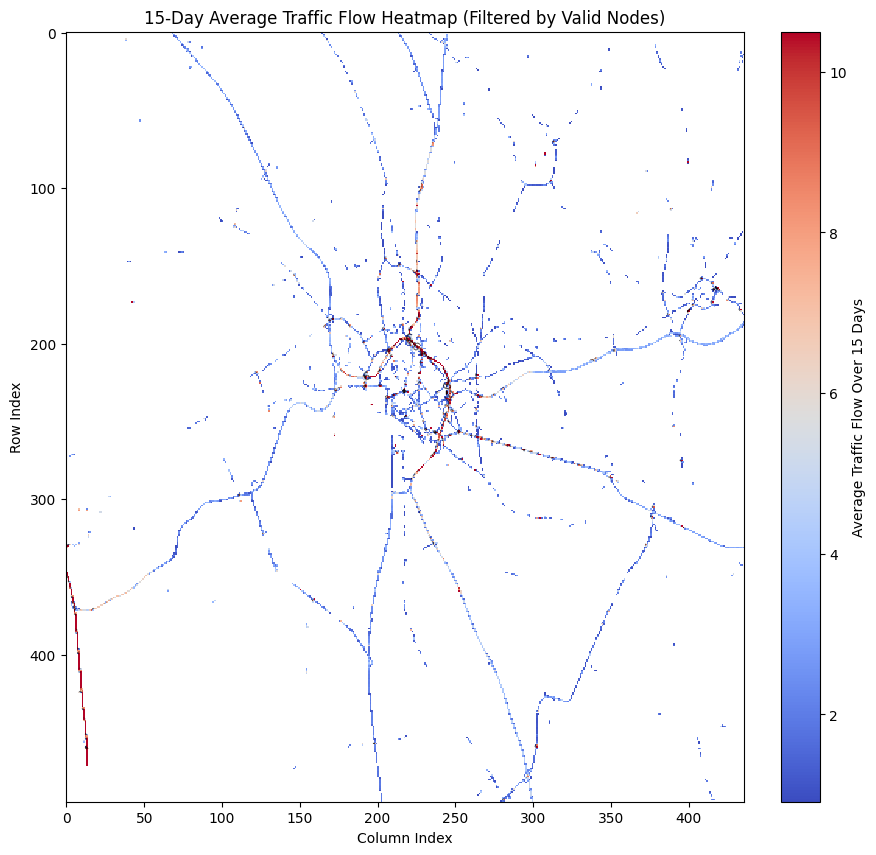

In [6]:
# 读取数据
march_filepath = r"E:\Techniche University of Munich\master thesis\ANTWERP\preprocessed_data\sliding_window\15days\30min\Antwerp_2020march_last_half_month_samples_30min_timesteps.txt"
traffic_data = readdata(march_filepath)  # 读取数据

# 重新调整数据形状为 (15, 48, 495, 436)
traffic_data_daily = traffic_data.reshape(15, 48, 495, 436)  # 48 个时间步对应 1 天

# 计算 15 天的平均交通流
traffic_avg_over_15_days = np.mean(traffic_data_daily, axis=0)  # 形状变为 (48, 495, 436)

# 计算所有时间步的平均值
traffic_avg_final = np.mean(traffic_avg_over_15_days, axis=0)  # 形状变为 (495, 436)

# 过滤无效区域
filtered_traffic = np.full((495, 436), np.nan)
for (r, c) in original_coords:
    filtered_traffic[r, c] = traffic_avg_final[r, c]

# 颜色归一化
vmin = np.nanpercentile(filtered_traffic, 5)
vmax = np.nanpercentile(filtered_traffic, 95)
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# 绘制热力图
plt.figure(figsize=(12, 10))
im = plt.imshow(filtered_traffic, cmap='coolwarm', norm=norm, interpolation='nearest')

# 添加颜色条
cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label("Average Traffic Flow Over 15 Days")

# 添加等高线，提高可视化对比度
contour = plt.contour(filtered_traffic, levels=10, colors='black', linewidths=0.5, alpha=0.7)
plt.clabel(contour, inline=True, fontsize=8)

# 图像标签
plt.title("15-Day Average Traffic Flow Heatmap (Filtered by Valid Nodes)")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

plt.show()

Loaded data shape: (720, 495, 436)


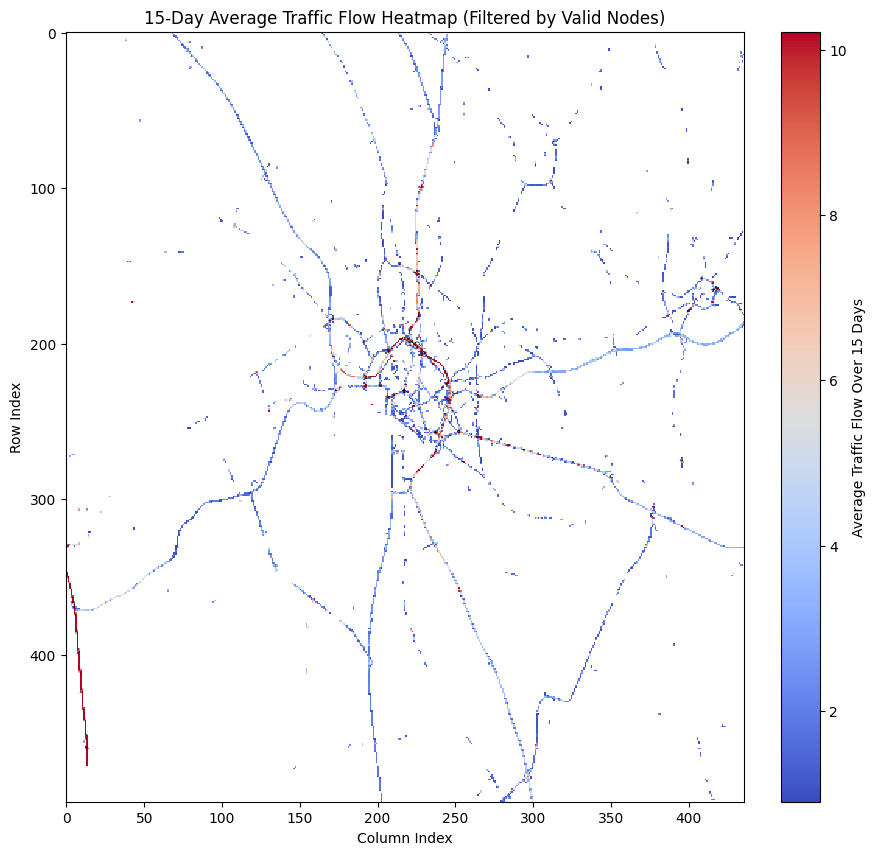

In [7]:
# 读取数据
march_filepath = r"E:\Techniche University of Munich\master thesis\ANTWERP\preprocessed_data\sliding_window\15days\30min\Antwerp_2020april_last_half_month_samples_30min_timesteps.txt"
traffic_data = readdata(march_filepath)  # 读取数据

# 重新调整数据形状为 (15, 48, 495, 436)
traffic_data_daily = traffic_data.reshape(15, 48, 495, 436)  # 48 个时间步对应 1 天

# 计算 15 天的平均交通流
traffic_avg_over_15_days = np.mean(traffic_data_daily, axis=0)  # 形状变为 (48, 495, 436)

# 计算所有时间步的平均值
traffic_avg_final = np.mean(traffic_avg_over_15_days, axis=0)  # 形状变为 (495, 436)

# 过滤无效区域
filtered_traffic = np.full((495, 436), np.nan)
for (r, c) in original_coords:
    filtered_traffic[r, c] = traffic_avg_final[r, c]

# 颜色归一化
vmin = np.nanpercentile(filtered_traffic, 5)
vmax = np.nanpercentile(filtered_traffic, 95)
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# 绘制热力图
plt.figure(figsize=(12, 10))
im = plt.imshow(filtered_traffic, cmap='coolwarm', norm=norm, interpolation='nearest')

# 添加颜色条
cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label("Average Traffic Flow Over 15 Days")

# 添加等高线，提高可视化对比度
contour = plt.contour(filtered_traffic, levels=10, colors='black', linewidths=0.5, alpha=0.7)
plt.clabel(contour, inline=True, fontsize=8)

# 图像标签
plt.title("15-Day Average Traffic Flow Heatmap (Filtered by Valid Nodes)")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

plt.show()

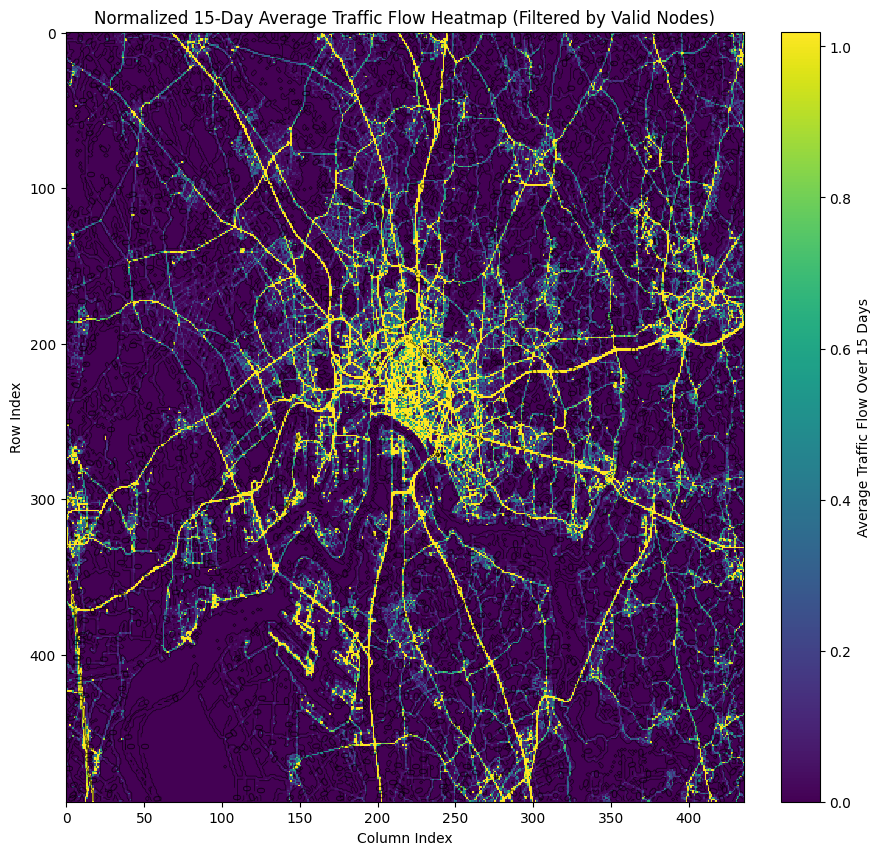

In [8]:
# 重新调整数据形状为 (15, 48, 495, 436)
traffic_data_daily = traffic_data.reshape(15, 48, 495, 436)  # 48 个时间步对应 1 天

# 计算 15 天的平均交通流
traffic_avg_over_15_days = np.mean(traffic_data_daily, axis=0)  # 形状变为 (48, 495, 436)

# 计算所有时间步的平均值
traffic_avg_final = np.mean(traffic_avg_over_15_days, axis=0)  # 形状变为 (495, 436)

# 颜色归一化
vmin = np.nanpercentile(traffic_avg_final, 5)
vmax = np.nanpercentile(traffic_avg_final, 95)
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# 绘制热力图
plt.figure(figsize=(12, 10))
im = plt.imshow(traffic_avg_final, cmap='viridis', norm=norm, interpolation='nearest')

# 添加颜色条
cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label("Average Traffic Flow Over 15 Days")

# 添加等高线，提高可视化对比度
contour = plt.contour(traffic_avg_final, levels=10, colors='black', linewidths=0.5, alpha=0.7)
plt.clabel(contour, inline=True, fontsize=8)

# 图像标签
plt.title("Normalized 15-Day Average Traffic Flow Heatmap (Filtered by Valid Nodes)")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

plt.show()
